# Teoría de Muestreo y Estimación
## Estadística Descriptiva e Inferencial (2021-2)
### Parcial 4
#### Juan Pablo Maldonado Castro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## 1. Teoría de Muestreo

1. Supongamos que se toman muestras de tamaño 2, ordenadas, de la población de valores 1, 3, 5 y 7. Para la distribución muestral de la media. 

Antes de resolver los ejercicios, construimos un dataframe con nuestras muestras ordenadas y la media correspondiente de cada una:

In [3]:
data = [1,3,5,7]
m_o = [] #Muestras ordenadas
m_o_m = [] #Medias
for i in data:
    for j in data:
        m_o.append(f"{i},{j}")
        m_o_m.append((i+j)/2)

df = pd.DataFrame({"Muestras ordenadas": m_o, "Medias": m_o_m})
df

,Muestras ordenadas,Medias
0,"1,1",1.0
1,"1,3",2.0
2,"1,5",3.0
3,"1,7",4.0
4,"3,1",2.0
5,"3,3",3.0
6,"3,5",4.0
7,"3,7",5.0
8,"5,1",3.0
9,"5,3",4.0


a) Encontrar $\mu_{\bar{x}}$

Simplemente calculamos la media de las medias de las muestras ordenadas:

In [4]:
print(df['Medias'].values.mean())

4.0


Tenemos que $\mu_\bar{x} = 4$

b) Calcular $\sigma_\bar{x}$

Simplemente calculamos la desviación estándar de las medias ordenadas:

In [6]:
print(df['Medias'].values.std())

1.5811388300841898


c) Construya la gráfica para la distribución de frecuencias.

Hacemos un histograma con seaborn, tomando a las medias de las muestras ordenadas como nuestros datos.

Text(0, 0.5, 'Frecuencia')

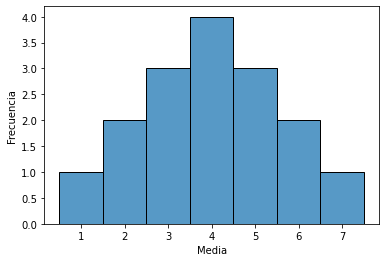

In [10]:
sns.histplot(df['Medias'].values, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])
plt.xlabel('Media')
plt.ylabel("Frecuencia")

2. De la población de valores 1, 2, 3 y 6 se seleccionan muestras de tamaño 3 ordenadas y con remplazo. La siguiente es una tabla de frecuencias para las medianas muestrales:

In [11]:
medianas = [1,2,3,6]
f = [10,22,22,10]

df = pd.DataFrame({"Mediana":medianas, "f":f})
df

,Mediana,f
0,1,10
1,2,22
2,3,22
3,6,10


Supongamos que la mediana de una muestra se usa para medir o estimar la media poblacional.

a) Encuentra el error muestral de cada mediana. Recordemos que el error muestral se define como: $e_{\text{mediana}}=\text{mediana} - \mu$.

Primero encontremos $\mu$, lo hacemos aprovechando que la clumna de medianas contiene justo los mismos elementos que los datos del conjunto:

In [16]:
media = df['Mediana'].values.mean()
print(media)

3.0


Vemos que la media de nuestros datos es $\mu = 3$. Lo que sigue es calcular nuestra columna de errores de la forma que ya habíamos mencionado.

In [17]:
df['Error Muestral'] = df['Mediana'] - media
df

,Mediana,f,Error Muestral
0,1,10,-2.0
1,2,22,-1.0
2,3,22,0.0
3,6,10,3.0


b) Construye una gráfica para la distribución muestra de la mediana.

Usando como datos de $x$ las medianas y asignándoles como altura las frecuencias, construimos un histograma con matplotlib:

Text(0, 0.5, 'Frecuencia')

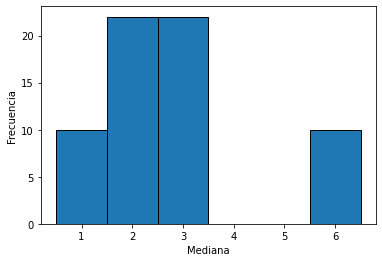

In [30]:
plt.bar(df['Mediana'].values, height = [10,22,22,10], width = 1,edgecolor = 'black')
plt.xlabel("Mediana")
plt.ylabel("Frecuencia")

c) Calcula la media de los errores muestrales.

Para esto simplemente calculamos la media de los errores muestrales que tenemos. Para ello usamos la función average de numpy, poniendo como pesos nuestras frecuencias y en los datos los errores muestrales.

In [45]:
m_e_m = np.average(df['Error Muestral'].values, weights=df['f'].values)
print(f"Media de los errores muestrales = {m_e_m}")

Media de los errores muestrales = -0.1875


Como podemos ver, la media de los errores muestrales es igual a -0.1875.

d) Localiza la media de la distribución muestral de la mediana.

Para esto aplicamos exactamente el mismo procedimiento que para encontrar la media de los errores muestrales. La única diferencia, es que ahora lo aplicaremos con las medianas.

In [40]:
m_m = np.average(df['Mediana'].values, weights = df['f'].values)
print(f"Media de la distribución muestral de la mediana = {m_m}")

Media de la distribución muestral de la mediana = 2.8125


Como podemos ver, la media de la distribución muestral de la mediana es 2.8125.

e) Determina la desviación estándar de los errores muestrales.

Como no encontré en ```numpy``` ni en ```pandas``` una función que calcule directamente la desviación estándar dados los valores y sus pesos(frecuencias). Nos apoyaremos en implementar la fórmula:

$$
\sigma_e = \sqrt{\frac{\sum(e_i - \mu_e)^2}{n}}
$$

Como el término que está dentro de la raíz, es un promedio de los errores muestrales menos su media respectiva elevados al cuadrado, simplemente aplicamos la función average sobre esto. Finalmente le sacamos raíz y obtenemos la desviación estándar sin mayor problema:

In [52]:
std_e_m = np.sqrt(np.average((df['Error Muestral'].values - m_e_m)**2,weights=df['f'].values))
print(f"Desviación estándar de los errores muestrales = {std_e_m}")

Desviación estándar de los errores muestrales = 1.529654781315052


Como podemos ver, la desviación estándar de los errores muestrales es de 1.52965...

f) Encuentra el error estándar de la mediana.

Recordemos que el error estándar de la mediana se define como simplemente la desviación estándar de la mediana:
$$
\sigma_\text{mediana} = \sqrt{\frac{\sum(\text{mediana} - \mu_{mediana})^2}{n}} = \sigma_e
$$

En este caso la desviación estándar de los errores muestrales de la mediana debe ser igual al error estándar de la mediana. Lo podemos comprobar aplicando lo mismo que en el inciso anterior, pero ahora usando los valores de las medianas en lugar del de los errores muestrales y también la media muestral de las medianas en lugar de la de los errores muestrales:

In [58]:
std_m = np.sqrt(np.average((df['Mediana']-m_m)**2, weights=df['f'].values))
print(f"Error estándar de la mediana = {std_m}")

Error estándar de la media = 1.529654781315052


Como vemos sí se cumplió que $\sigma_e = \sigma_\text{mediana}$, dándonos que el error estándar de la mediana es de 1.52965...

3. Supongamos que una máquina automática utilizada para llenar latas de sopa tiene $\mu = 16$ oz y $\sigma = 0.5$ oz, si se obtiene una muestra de 50 latas, encuentra la probabilidad de que la media muestral de llenado $\bar{x}$ sea:

a) mayor que 15.88 oz

Queremos ver el valor de $P(\bar{X} > 15.88 oz)$. Para ello ocupamos una función que calcule el valor del puntaje estándar $z$ dado el valor de $\bar{X}$, la media, la desviación estándar y el tamaño de la muestra:

In [62]:
def getZ(x,media,std,n):
    return (x - media)/(std/np.sqrt(n))

Si aplicamos la función de ```st.norm.cdf``` (cumulative distribution function), vamos a obtener el resultado de $P(\bar{X}<15.88oz)$, pero queremos el de $P(\bar{X}>15.88oz)$, así que le restamos 1 para obtener lo que queremos:

In [67]:
print(getZ(15.88,16,0.5,50))

-1.697056274847703


In [69]:
print(f"P(X > 15.88oz) = {1 - st.norm.cdf(getZ(15.88,16,0.5,50))}")

P(X > 15.88oz) = 0.9551569891148166


Vemos que $P(\bar{X} > 15.88oz) = 0.95515... = 95.5156...\%$.

b) mayor que 15.9 oz y menor que 16.09 oz

Aplicamos la función de ```st.norm.cdf``` a los valores de $\bar{X} = 15.9$ y $16.09$. Los resultados de estos los restamos entre sí y esto define $P(15.9oz < \bar{X} < 16.09oz)$:

In [70]:
print(f"P(15.9<X<16.09) = {st.norm.cdf(getZ(16.09,16,0.5,50)) - st.norm.cdf(getZ(15.9,16,0.5,50))}")

P(15.9<X<16.09) = 0.8198045026862724


Vemos que $P(15.9<\bar{X}<16.09) = 0.819804... = 81.9804...\%$

c) menor que 16.2 oz

Aplicamos la función de ```st.norm.cdf``` para $\bar{X} = 16.02$ y obtenemos el resultado directamente:

In [73]:
print(f"P(X<16.2) = {st.norm.cdf(getZ(16.2,16,0.5,50))}")

P(X<16.2) = 0.9976611325094763


Vemos que $P(X<16.2) = 0.99766... = 99.766...\%$.

4. Se afirma que un nuevo fármaco es efectivo en un 80% para tratar pacientes con una enfermedad particular. Al usarlo en una muestra de 64 enfermos y denotar $\hat{p}$ la proporción muestral de pacientes tratados de manera efectiva, encuentra:

(a) $P(0.78 < \hat{p} < 0.82)$.

Definamos una función que nos permita calcular el valor de $Z$ a partir de valores de $p$.

In [103]:
def getZ_2(p, p_mean, n):
    return (p - p_mean)/(((p_mean*(1-p_mean))/n)**(1/2))

getZ_2(0.82, 0.8, 64)
print(st.norm.cdf(getZ_2(0.82, 0.8, 64)))
print(st.norm.cdf(getZ_2(0.78, 0.8, 64)))
print(st.norm.cdf(getZ_2(0.82, 0.8, 64)) - st.norm.cdf(getZ_2(0.78, 0.8, 64)))

0.6554217416103235
0.3445782583896757
0.3108434832206478


Aplicamos esta función a los valores $\hat{p} = 0.78$ y $0.82$. A lo obtenido le aplicamos ```st.norm.cdf``` y la resta de los dos nos da el resultado:

In [105]:
print(f"P(0.78 < p < 0.82) = {st.norm.cdf(getZ_2(0.82,0.8,64)) - st.norm.cdf(getZ_2(0.78,0.8,64))}")

P(0.78 < p < 0.82) = 0.3108434832206478


Vemos que $P(0.78 < \bar{p} < 0.82) = 0.310843... = 31.0843...\%$

(b) $P(0.82 < \bar{p} < 0.83)$.

Hacemos justo el mismo procedimiento que en el inciso anterior pero ahora con los valores de $\hat{p}$ que pide el problema:

In [106]:
print(f"P(0.82 < p < 0.83) = {st.norm.cdf(getZ_2(0.83,0.8,64)) - st.norm.cdf(getZ_2(0.82,0.8,64))}")

P(0.82 < p < 0.83) = 0.07032514063960238


Vemos que $P(0.82 < \hat{p} < 0.83) = 0.070325... = 7.0325...\%$

(c) $P(\hat{p} < 0.81)$.

Simplemente encontramos el valor de $Z$ correspondiente al valor de $\hat{p} = 0.81$ y le aplicamos la función ```st.norm.cdf``` para obtener directamente el resultado:

In [107]:
print(f"P(p<0.81) = {st.norm.cdf(getZ_2(0.81,0.8,64))}")

P(p<0.81) = 0.5792597094391031


Vemos que $P(\hat{p} < 0.81) = 0.5792597... = 57.92597...\%$

## 2. Estimación

1. En un estudio para estimar la verdadera proporción de ciudadanos estadounidenses que están a favor de legislar el control de armas, de una muestra aleatoria de 5000 personas, hubo 2800 a favor de tal legislación.

(a) Construya un intervalo de confianza del 90% para aproximar la verdadera proporción de los ciudadanos estadounidenses simpatizantes de legislar el control de armas.

Para esto usamos la función de ```st.norm.interval```, donde $\alpha = 0.9$, *loc* será igual a $\hat{p} = x/n = 2800/5000$ y *scale* será el valor de $\sigma_{\hat{p}}$ que se define como:

$$
\sigma_{\hat{p}} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

In [130]:
sigma_p = np.sqrt(((2800/5000) * (1 - 2800/5000) )/5000)
st.norm.interval(alpha=0.90, loc = 2800/5000, scale = (sigma_p))

(0.5484531744008225, 0.5715468255991776)

Podemos ver que el intervalo de confianza del 90% de la verdadera proporción de $p$ de ciudadanos estadounidenses simpatizantes de legislar el control de armas es $(0.5484..., 0.5715...)$.

(b) ¿Qué tan grande debe de ser la muestra elegida si queremos tener un $95\%$ de confianza en que el error de estimación es menor que 0.01? Usar el valor de $p$ obtenido en el inciso anterior para estimar $p$.

Recordemos que una forma de obtener $n$ a partir de $p$ es con:
$$
n = \left(\frac{z_{\alpha/2}}{E}\right)^2p(1-p)
$$

Donde $E = 0.01$, el valor de $z_{\alpha/2}$ lo calculamos con la función ```st.norm.ppf``` considerando que en este caso $\alpha/2$ = 1 - ((1-0.95)/2) = 1- 0.025 (Recordemos que restamos esto a 1 porque así funciona esta librería de Python) y finalmente $p = 2800/5000$ (del ejercicio pasado).

In [158]:
z_a_2 = st.norm.ppf(1-0.025)
E = 0.01
p = 2800/5000
n = ((z_a_2/E)**2)*(p)*(1-p)
print(f"n = {n}")

n = 9465.354534190323


Como vemos $n = 9465.35434....$ que podemos subir al siguiente entero $n = 9466$. Entonces el tamaño de nuestra muestra elegida si queremos tener un $95\%$ de confianza en que el error de estimación es menor que 0.01 es de $n = 9466$.

2. Para estimar la varianza de los diámetros de las tapas rosca en las botellas de medicina, se examinó una muestra de 20 tapas encontrándose una varianza de 0.18 mm cuadrados. Suponiendo que los diámetros de las tapas se distribuyen normalmente, construya un intervalo de confianza del 99% de la verdadera varianza de esos diámetros.

Recordemos que una forma de encontrar los límites de los intervalos dados los datos que nos dio el problema es con:

$$
L_1 = \frac{gl\cdot\sigma^2}{\chi^2_{\alpha/2}(gl)}
$$
$$
L_1 = \frac{gl\cdot\sigma^2}{\chi^2_{1-\alpha/2}(gl)}
$$

Los valores de $\chi^2$ los podemos calcular con los grados de libertad que tenemos (en este caso $20 - 1 = 19$) y $\alpha/2 = 1 - (1 - 0.99)/2 = 0.995$ y $1-\alpha/2 = 0.005$ (recordemos que Python asume el valor que conocemos de $1-\alpha$ como si fuera $\alpha$, por eso restamos 1) usando la función ```st.chi2.ppf``` a la cual le damos estos dos datos. Calculando los límites del intervalo como ya mencionamos obtenemos:

In [254]:
L1 = 0.18*(20-1)/st.chi2.ppf(0.995, 20-1)
L2 = 0.18*(20-1)/st.chi2.ppf(0.005,20-1)
print(f"({L1}, {L2})")

(0.08864178265806022, 0.4997098581200557)


Como vemos, nuestro intervalo de confianza para la varianza de esos diámetros es de $(0.0886..., 0.4997...)$ en milímetros cuadrados.

3. En un examen final del curso de cálculo en una universidad grande, se calificó rápidamente una muestra de 45 exámenes para estimar la calificación promedio. De una experiencia anteriro, se había determinado que σ = 14.5. Si los 45 exámenes dieron una media de 62 y una desviación estándar de 18.1, definir un intervalo de confianza del 95% para la verdadera calificación promedio en el examen de todos los estudiantes de la universidad.

Tenemos como datos $n= 45$, $\mu = 62$, $\sigma = 14.5$ y que el intervalo de confianza debe ser de 0.95. Entonces usando la función de ```st.norm.interval``` calculamos el intervalo dando como parámetros el porcentaje de 0.95, *loc* equivalente al valor de $\mu$, y *scale* es igual a $\sigma/\sqrt{n}$.

In [257]:
st.norm.interval(0.95, loc=62, scale = 14.5/np.sqrt(45))

(57.763474387213186, 66.2365256127868)

Como vemos, el intervalo de confianza para $\mu$ es de $(57.76..., 66.23....)$.

4. Los diámetros de cierto tipo de pernos producidos por una firma grande se distribuyen normalmente. Supongamos que una muestra de 20 pernos dio $\bar{x} = 8.02$ mm y $s = 0.06$ mm.

(a) Encuentra $E$ tal que podamos tener un $95\%$ de confianza en que $\mu$ difiere de $\bar{x}$ en menos que E.

Tenemos que $\sigma = 0.06$, $\alpha/2 = 1 - (1-0.95)/2 = 0.975$ (definido acorde a como pide Python) y $n = 20$. Recordemos que una forma de calcular $E$ era la siguiente:

$$
E = z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
$$
El valor de $z_{\alpha/2}$ lo obtenemos con ayuda de la función ```st.norm.ppf``` que recibe nada más el parámetro de $\alpha/2$. Sustituimos los valores que conocemos y obtenemos directamente el valor de $E$:

In [262]:
z_a_2 = st.norm.ppf(0.975)
sigma = 0.06
n = 20
E = z_a_2*(sigma)/np.sqrt(n)
print(f"E = {E}")

E = 0.026295676217297444


Vemos que para tener un $95\%$ de confianza en que $\mu$ difiere de $\bar{x}$ ocupamos $E = 0.026$.

(b) Estime $\mu$ construyendo un intervalo del $95\%$ de confianza:

Simplemente aplicamos la función ```st.norm.interval``` donde el parámetro inicial será nuestro porcentaje de 0.95, el de *loc* será igual $\bar{x}$ y el de *scale* será $\sigma/\sqrt{n}$. Esto nos dará directamente el intervalo de confianza que buscamos:

In [263]:
x = 8.02
st.norm.interval(0.95, loc = 8.02, scale = sigma/np.sqrt(n))

(7.993704323782702, 8.046295676217296)

Como podemos ver, el intervalo de $95\%$ de confianza para estimar $\mu$ es de $(7.9937..., 8.0462...)$.